# Project 1 - College Football 
For this Project, I will be analyzing a College Football Dataset. The dataframe will contain rows for every FBS team, with columns for a vast variety of statistics, including Yards per game and Defensive Rating. This project will be seperated into three parts: Data Collection, Data Cleaning/Exploration, and Prediction/Inference

Some questions I would like to answer:
- Do Teams in the same conferences have similar playstyles?
- Is Offense or Defense more important for winning?
All of my data cleaning and exploration will be with these questions in mind.

# Part 1 - Data Collection
For part one of this project I will simply be collecting my data and getting it ready for analysis. This involves importing the necessary libraries and reading in the data. I found my data through Kaggle - https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019. 

I wanted to collect data from every FBS team during the 2023 football season. The data includes over 100 columns of data, which will make it ideal for analysis.

In [159]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold


import warnings
warnings.filterwarnings("ignore")

In [161]:
#cfb = pd.read_csv('C:/Users/bentb/Desktop/Jupyter/College Football/cfb23.csv')
cfb = pd.read_csv('cfb23.csv')

In [162]:
# This makes it easier to see all columns of the DF, since there are a lot
pd.set_option('display.max_columns', None)
cfb

,Unnamed: 0,Off Rank,Team,Games,Win-Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,3rd Down Def Rank,Opp 3rd Conversion,Opp 3rd Attempt,Opponent 3rd Percent,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks_x,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Touchbacks_y,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown_x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,0,1,LSU (SEC),13,10-3,841,7065,8.40,78,543.5,105,882,5416,6.14,47,47,416.6,2,129,71,0.550,114,78,174,0.448,106,6,15,0.400,31,13,30,0.433,67,79,672,51.69,103,116,144,14,274,103,116,144,14,274,75,35,52,723,0,20.66,75,35,52,723,0,20.66,3,411,286,5,4406,10.72,15.41,44,338.9,115,268,420,3323,23,7.91,12.40,255.6,2,2,-1,0,-0.50,2,2,-1,0,-0.50,109,46,17,16,8,41,0.891,20,65,30,19,10,59,0.908,85,462,2093,4.53,24,161.0,10,430,2659,6.18,34,204.5,78,47,41,4,0,11,0,364,28.0,1,79,78,1,0,12,1,592,45.5,43,22,96,1.69,65,53,40,302,73,5.6,94,375:09,28:51,23,4,10,14,3,5,8,6,0.46
1,1,2,Oregon (Pac-12),14,12-2,951,7440,7.82,82,531.4,22,893,4458,4.99,26,27,318.4,3,155,79,0.510,36,68,190,0.358,6,19,25,0.760,49,18,38,0.474,106,93,848,60.57,64,84,140,29,253,64,84,140,29,253,13,27,73,437,0,16.19,13,27,73,437,0,16.19,1,514,397,5,4857,9.45,12.23,49,346.9,54,296,492,3022,16,6.14,10.21,215.9,120,7,96,0,13.71,120,7,96,0,13.71,68,42,10,13,12,35,0.833,40,74,27,29,9,65,0.878,10,401,1436,3.58,10,102.6,29,437,2583,5.91,33,184.5,9,27,20,2,0,15,0,231,16.5,2,83,75,5,0,12,0,619,44.2,1,5,31,0.36,100,58,26,367,71,5.1,41,434:35,31:03,9,6,12,18,2,5,7,11,0.79
2,2,3,Oklahoma (Big 12),13,10-3,974,6591,6

# Part 2 - Exploratory Data Analysis

EDA involves cleaning the data to make it easier to work with, removing useless info, and potentially making entirely new data from what exists already. It also involves making graphs and such to draw visual conclusions, though nothing concrete should be drawn until the Prediction and inference section.

The dataset unfortunately has quite a bit wrong with it, but this is standard. Most data you work with isn't primed and ready for analysis, so knowing how to make it as such is a valuable skill. For example, In this first cell, I am making a wins column and a loss column, since that data was not already included in the dataframe. I am taking the string of wins and losses and transforming it into two new numeric columns using regular expressions.

In [163]:
# Creating new, numeric columns to compare wins/losses with other stats
cfb[['Wins', 'Losses']] = cfb['Win-Loss'].str.extract(r'(\d+)-(\d+)')

In [164]:
# Cleaning the dataset by removing the rows with no values recorded
cfb = cfb[cfb['Off Rank']!='Reclassifying']

Most of the data in this dataframe is unfortunately not encoded numerically. This makes it impossible to do analysis, for example computing the mean or sums. Here, I am taking a column list of all columns that should be numeric and brute-changing the data type.

In [165]:
columns_to_convert = ['Unnamed: 0',
 'Off Rank',
 'Games',
 'Off Plays',
 'Off Yards',
 'Off Yards/Play',
 'Off TDs',
 'Off Yards per Game',
 'Def Rank',
 'Def Plays',
 'Yards Allowed',
 'Yards/Play Allowed',
 'Off TDs Allowed',
 'Total TDs Allowed',
 'Yards Per Game Allowed',
 '3rd Down Rank',
 '3rd Attempts',
 '3rd Conversions',
 '3rd Percent',
 '3rd Down Def Rank',
 'Opp 3rd Conversion',
 'Opp 3rd Attempt',
 'Opponent 3rd Percent',
 '4th Down Rank',
 '4th Attempts',
 '4th Conversions',
 '4th Percent',
 '4rd Down Def Rank',
 'Opp 4th Conversion',
 'Opp 4th Attempt',
 'Opponent 4th Percent',
 'Penalty Rank',
 'Penalties',
 'Penalty Yards',
 'Penalty Yards Per Game',
 'First Down Def Rank',
 'Opp First Down Runs',
 'Opp First Down Passes',
 'Opp First Down Penalties',
 'Opp First Downs',
 'First Down Rank',
 'First Down Runs',
 'First Down Passes',
 'First Down Penalties',
 'First Downs',
 'Kickoff Return Def Rank',
 'Opp Kickoff Returns',
 'Kickoff Touchbacks_x',
 'Opponent Kickoff Return Yards',
 'Opp Kickoff Return Touchdowns Allowed',
 'Avg Yards per Kickoff Return Allowed',
 'Kickoff Return Rank',
 'Kickoffs Returned',
 'Kickoff Touchbacks_y',
 'Kickoff Return Yards',
 'Kickoff Return Touchdowns',
 'Avg Yard per Kickoff Return',
 'Passing Off Rank',
 'Pass Attempts',
 'Pass Completions',
 'Interceptions Thrown_x',
 'Pass Yards',
 'Pass Yards/Attempt',
 'Yards/Completion',
 'Pass Touchdowns',
 'Pass Yards Per Game',
 'Pass Def Rank',
 'Opp Completions Allowed',
 'Opp Pass Attempts',
 'Opp Pass Yds Allowed',
 'Opp Pass TDs Allowed',
 'Yards/Attempt Allowed',
 'Yards/Completion Allowed',
 'Pass Yards Per Game Allowed',
 'Punt Return Def Rank',
 'Opp Punt Returns',
 'Opp Net Punt Return Yards',
 'Opp Punt Return Touchdowns Allowed',
 'Avg Yards Allowed per Punt Return',
 'Punt Return Rank',
 'Punt Returns',
 'Net Punt Return Yards',
 'Punt Return Touchdowns',
 'Avg Yards Per Punt Return',
 'Redzone Def Rank',
 'Opp Redzone Attempts',
 'Opp Redzone Rush TD Allowed',
 'Opp Redzone Pass Touchdowns Allowed',
 'Opp Redzone Field Goals Made',
 'Opp Redzone Scores',
 'Redzone Points Allowed',
 'Redzone Off Rank',
 'Redzone Attempts',
 'Redzone Rush TD',
 'Redzone Pass TD',
 'Redzone Field Goals Made',
 'Redzone Scores',
 'Redzone Points',
 'Rushing Def Rank',
 'Opp Rush Attempts',
 'Opp Rush Yards Alloweed',
 'Yds/Rush Allowed',
 'Opp Rush Touchdowns Allowed',
 'Rush Yards Per Game Allowed',
 'Rushing Off Rank',
 'Rush Attempts',
 'Rush Yds',
 'Yards/Rush',
 'Rushing TD',
 'Rushing Yards per Game',
 'Scoring Def Rank',
 'Touchdowns Allowed',
 'Opponent Extra Points',
 '2 Point Conversions Allowed',
 'Opp Deflected Extra Points',
 'Opp Feild Goals Made',
 'Opp Safety',
 'Points Allowed',
 'Avg Points per Game Allowed',
 'Scoring Off Rank',
 'Touchdowns',
 'PAT',
 '2 Point Conversions',
 'Defensive Points',
 'Feild Goals',
 'Safety',
 'Total Points',
 'Points Per Game',
 'Sack Rank',
 'Sacks',
 'Sack Yards',
 'Average Sacks per Game',
 'Tackle for Loss Rank',
 'Solo Tackle For Loss',
 'Assist Tackle For Loss',
 'Tackle for Loss Yards',
 'Total Tackle For Loss',
 'Tackle For Loss Per Game',
 'Time of Possession Rank',
 'Turnover Rank',
 'Fumbles Recovered',
 'Opponents Intercepted',
 'Turnovers Gain',
 'Fumbles Lost',
 'Interceptions Thrown_y',
 'Turnovers Lost',
 'Turnover Margin',
 'Avg Turnover Margin per Game',
 'Wins',
 'Losses']

In [166]:
# Removing rows where data was not captured for that specific team
cfb = cfb[cfb['Off Rank']!='-']

In [167]:
#Turning all numeric columns into float values, so you can compare. I did this by gathering a list of all columns and removing the ones that aren't numeric (Time of posession, Team name, etc...
cfb[columns_to_convert] = cfb[columns_to_convert].apply(pd.to_numeric)

In [168]:
cfb

,Unnamed: 0,Off Rank,Team,Games,Win-Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,3rd Down Def Rank,Opp 3rd Conversion,Opp 3rd Attempt,Opponent 3rd Percent,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks_x,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Touchbacks_y,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown_x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses
0,0,1,LSU (SEC),13,10-3,841,7065,8.40,78,543.5,105,882,5416,6.14,47,47,416.6,2,129,71,0.550,114,78,174,0.448,106,6,15,0.400,31,13,30,0.433,67,79,672,51.69,103,116,144,14,274,103,116,144,14,274,75,35,52,723,0,20.66,75,35,52,723,0,20.66,3,411,286,5,4406,10.72,15.41,44,338.9,115,268,420,3323,23,7.91,12.40,255.6,2,2,-1,0,-0.50,2,2,-1,0,-0.50,109,46,17,16,8,41,0.891,20,65,30,19,10,59,0.908,85,462,2093,4.53,24,161.0,10,430,2659,6.18,34,204.5,78,47,41,4,0,11,0,364,28.0,1,79,78,1,0,12,1,592,45.5,43,22,96,1.69,65,53,40,302,73,5.6,94,375:09,28:51,23,4,10,14,3,5,8,6,0.46,10,3
1,1,2,Oregon (Pac-12),14,12-2,951,7440,7.82,82,531.4,22,893,4458,4.99,26,27,318.4,3,155,79,0.510,36,68,190,0.358,6,19,25,0.760,49,18,38,0.474,106,93,848,60.57,64,84,140,29,253,64,84,140,29,253,13,27,73,437,0,16.19,13,27,73,437,0,16.19,1,514,397,5,4857,9.45,12.23,49,346.9,54,296,492,3022,16,6.14,10.21,215.9,120,7,96,0,13.71,120,7,96,0,13.71,68,42,10,13,12,35,0.833,40,74,27,29,9,65,0.878,10,401,1436,3.58,10,102.6,29,437,2583,5.91,33,184.5,9,27,20,2,0,15,0,231,16.5,2,83,75,5,0,12,0,619,44.2,1,5,31,0.36,100,58,26,367,71,5.1,41,434:35,31:03,9,6,12,18,2,5,7,11,0.79,12,2
2,2,3,Oklahoma (Big 

Now that all the data is numeric, we can compare the values! This plot is simply here to test... If the values were strings, the regression plot wouldn't work. But while we're here, we can see this simple regression line shows us a very slightly negative correlation between offensive touchdowns allowed, and offensive touchdowns scored. I believe this correlation is almost zero because offense and defense are entirely different categories that have no effect on each other, but it is slightly negative because tpically teams with the best resources (money, facilities, etc...) draw good players on both ends of the ball.

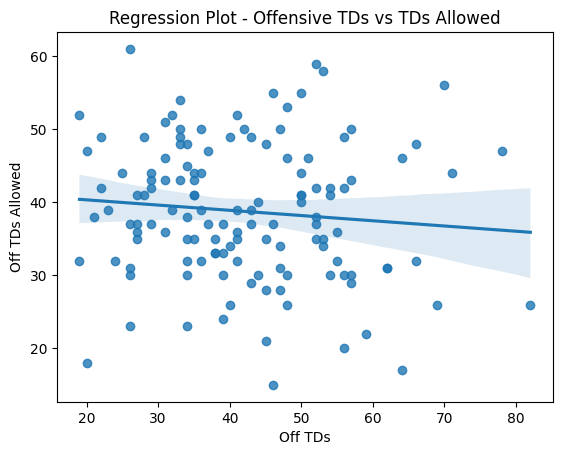

In [169]:
sns.regplot(x='Off TDs', y='Off TDs Allowed', data=cfb)
plt.title('Regression Plot - Offensive TDs vs TDs Allowed')
plt.show()

In [170]:
#Using regular expressions to create a new 'Conference' Column
cfb['Conference'] = cfb['Team'].str.extract(r'\((.*?)\)')

In [171]:
conferences = cfb[['Team', 'Conference', 'Wins']]

In [172]:
conferences.groupby('Conference').size().reset_index(name='Count')

,Conference,Count
0,AAC,14
1,ACC,13
2,Big 12,14
3,Big Ten,14
4,CUSA,7
5,FBS Independent,4
6,FL,1
7,MAC,11
8,Mountain West,12
9,OH,1


We can see that there are a couple outlier conferences, such as 'FL' and 'OH' which are not FBS conferences. perhaps they were only kept because certain FBS schools had games against those teams. I will delete them because those teams will not meaningfully contribute to the data, and they will likely be outliers. For example, a 12 win FCS school should not be compared to a 12 win FBS school.

In [173]:
cfb = cfb[~cfb['Conference'].isin(['OH', 'FL'])]

In [174]:
cfb

,Unnamed: 0,Off Rank,Team,Games,Win-Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,3rd Down Def Rank,Opp 3rd Conversion,Opp 3rd Attempt,Opponent 3rd Percent,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks_x,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Touchbacks_y,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown_x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses,Conference
0,0,1,LSU (SEC),13,10-3,841,7065,8.40,78,543.5,105,882,5416,6.14,47,47,416.6,2,129,71,0.550,114,78,174,0.448,106,6,15,0.400,31,13,30,0.433,67,79,672,51.69,103,116,144,14,274,103,116,144,14,274,75,35,52,723,0,20.66,75,35,52,723,0,20.66,3,411,286,5,4406,10.72,15.41,44,338.9,115,268,420,3323,23,7.91,12.40,255.6,2,2,-1,0,-0.50,2,2,-1,0,-0.50,109,46,17,16,8,41,0.891,20,65,30,19,10,59,0.908,85,462,2093,4.53,24,161.0,10,430,2659,6.18,34,204.5,78,47,41,4,0,11,0,364,28.0,1,79,78,1,0,12,1,592,45.5,43,22,96,1.69,65,53,40,302,73,5.6,94,375:09,28:51,23,4,10,14,3,5,8,6,0.46,10,3,SEC
1,1,2,Oregon (Pac-12),14,12-2,951,7440,7.82,82,531.4,22,893,4458,4.99,26,27,318.4,3,155,79,0.510,36,68,190,0.358,6,19,25,0.760,49,18,38,0.474,106,93,848,60.57,64,84,140,29,253,64,84,140,29,253,13,27,73,437,0,16.19,13,27,73,437,0,16.19,1,514,397,5,4857,9.45,12.23,49,346.9,54,296,492,3022,16,6.14,10.21,215.9,120,7,96,0,13.71,120,7,96,0,13.71,68,42,10,13,12,35,0.833,40,74,27,29,9,65,0.878,10,401,1436,3.58,10,102.6,29,437,2583,5.91,33,184.5,9,27,20,2,0,15,0,231,16.5,2,83,75,5,0,12,0,619,44.2,1,5,31,0.36,100,58,26,367,71,5.1,41,434:35,31:03,9,6,12,18,2,5,7,11,0.79,12,2,Pac-1

In [175]:
# This simplifies the Team column by removing conference, since that information is now included in it's own column.
cfb['Team'] = cfb['Team'].str.replace(r' \(.+?\)', '', regex=True)

In [176]:
cfb

,Unnamed: 0,Off Rank,Team,Games,Win-Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,3rd Down Def Rank,Opp 3rd Conversion,Opp 3rd Attempt,Opponent 3rd Percent,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks_x,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Touchbacks_y,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown_x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses,Conference
0,0,1,LSU,13,10-3,841,7065,8.40,78,543.5,105,882,5416,6.14,47,47,416.6,2,129,71,0.550,114,78,174,0.448,106,6,15,0.400,31,13,30,0.433,67,79,672,51.69,103,116,144,14,274,103,116,144,14,274,75,35,52,723,0,20.66,75,35,52,723,0,20.66,3,411,286,5,4406,10.72,15.41,44,338.9,115,268,420,3323,23,7.91,12.40,255.6,2,2,-1,0,-0.50,2,2,-1,0,-0.50,109,46,17,16,8,41,0.891,20,65,30,19,10,59,0.908,85,462,2093,4.53,24,161.0,10,430,2659,6.18,34,204.5,78,47,41,4,0,11,0,364,28.0,1,79,78,1,0,12,1,592,45.5,43,22,96,1.69,65,53,40,302,73,5.6,94,375:09,28:51,23,4,10,14,3,5,8,6,0.46,10,3,SEC
1,1,2,Oregon,14,12-2,951,7440,7.82,82,531.4,22,893,4458,4.99,26,27,318.4,3,155,79,0.510,36,68,190,0.358,6,19,25,0.760,49,18,38,0.474,106,93,848,60.57,64,84,140,29,253,64,84,140,29,253,13,27,73,437,0,16.19,13,27,73,437,0,16.19,1,514,397,5,4857,9.45,12.23,49,346.9,54,296,492,3022,16,6.14,10.21,215.9,120,7,96,0,13.71,120,7,96,0,13.71,68,42,10,13,12,35,0.833,40,74,27,29,9,65,0.878,10,401,1436,3.58,10,102.6,29,437,2583,5.91,33,184.5,9,27,20,2,0,15,0,231,16.5,2,83,75,5,0,12,0,619,44.2,1,5,31,0.36,100,58,26,367,71,5.1,41,434:35,31:03,9,6,12,18,2,5,7,11,0.79,12,2,Pac-12
2,2,3,Oklahom

In [177]:
cfb.sort_values('Passing Off Rank')

,Unnamed: 0,Off Rank,Team,Games,Win-Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,3rd Down Def Rank,Opp 3rd Conversion,Opp 3rd Attempt,Opponent 3rd Percent,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks_x,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Touchbacks_y,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown_x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses,Conference
1,1,2,Oregon,14,12-2,951,7440,7.82,82,531.4,22,893,4458,4.99,26,27,318.4,3,155,79,0.510,36,68,190,0.358,6,19,25,0.760,49,18,38,0.474,106,93,848,60.57,64,84,140,29,253,64,84,140,29,253,13,27,73,437,0,16.19,13,27,73,437,0,16.19,1,514,397,5,4857,9.45,12.23,49,346.9,54,296,492,3022,16,6.14,10.21,215.9,120,7,96,0,13.71,120,7,96,0,13.71,68,42,10,13,12,35,0.833,40,74,27,29,9,65,0.878,10,401,1436,3.58,10,102.6,29,437,2583,5.91,33,184.5,9,27,20,2,0,15,0,231,16.5,2,83,75,5,0,12,0,619,44.2,1,5,31,0.36,100,58,26,367,71,5.1,41,434:35,31:03,9,6,12,18,2,5,7,11,0.79,12,2,Pac-12
11,11,12,Washington,15,14-1,985,6931,7.04,66,462.1,96,1057,6101,5.77,48,48,406.7,28,172,76,0.442,63,80,207,0.386,26,14,22,0.636,19,15,37,0.405,124,112,1029,68.60,130,124,168,40,332,130,124,168,40,332,12,41,48,663,0,16.17,12,41,48,663,0,16.17,2,574,376,12,5155,8.98,13.71,38,343.7,117,345,583,3879,23,6.65,11.24,258.6,14,8,24,0,3.00,14,8,24,0,3.00,84,54,23,14,9,46,0.852,55,73,27,22,14,63,0.863,58,474,2222,4.69,25,148.1,104,411,1776,4.32,28,118.4,54,48,41,2,0,13,0,372,24.8,13,69,64,2,0,18,2,540,36.0,5,12,86,0.80,118,53,24,229,65,4.3,63,452:00,30:08,66,4,16,20,8,12,20,0,0.00,14,1,P

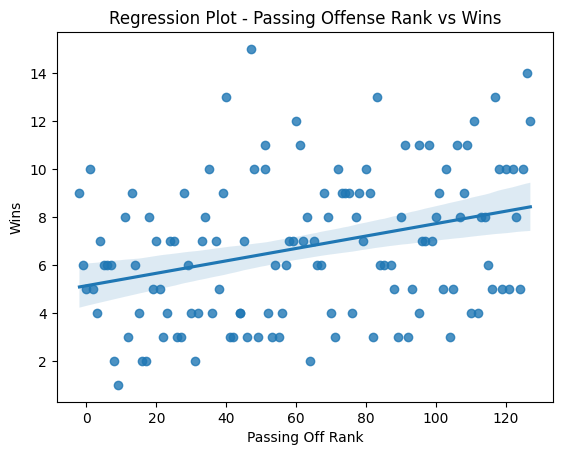

In [178]:
# This is a simple regplot drawn to determine if there is a relationship between wins and passing offense. No strict numbers are computer, as I will wait for the inference section to do so.
sns.regplot(x=128-cfb['Passing Off Rank'], y='Wins', data=cfb)
plt.title('Regression Plot - Passing Offense Rank vs Wins')
plt.show()

Specifically for the question "Do teams in the same conference have similar conferences?" I don't want to analyze too many variables, so I will make a simpler dataframe with only some crucial columns. This will be a seperate dataframe since the other stats will come in handy for the other questions. Most of the data in the dataframe is nice to have, but having such a large dataframe clutters things. Here I am creating a simpler dataframe with only some key variables. I may change this later to house more/less of the variables.

In [179]:
#simpler = cfb[['Wins', 'Off Rank', 'Def Rank', 'Off Yards', 'Yards Allowed', 'Passing Off Rank', 'Pass Def Rank', 'Rushing Off Rank']]
conferences = cfb[['Team', 'Conference', 'Wins', 'Off Rank', 'Def Rank', 'Rushing Off Rank', 'Passing Off Rank']]

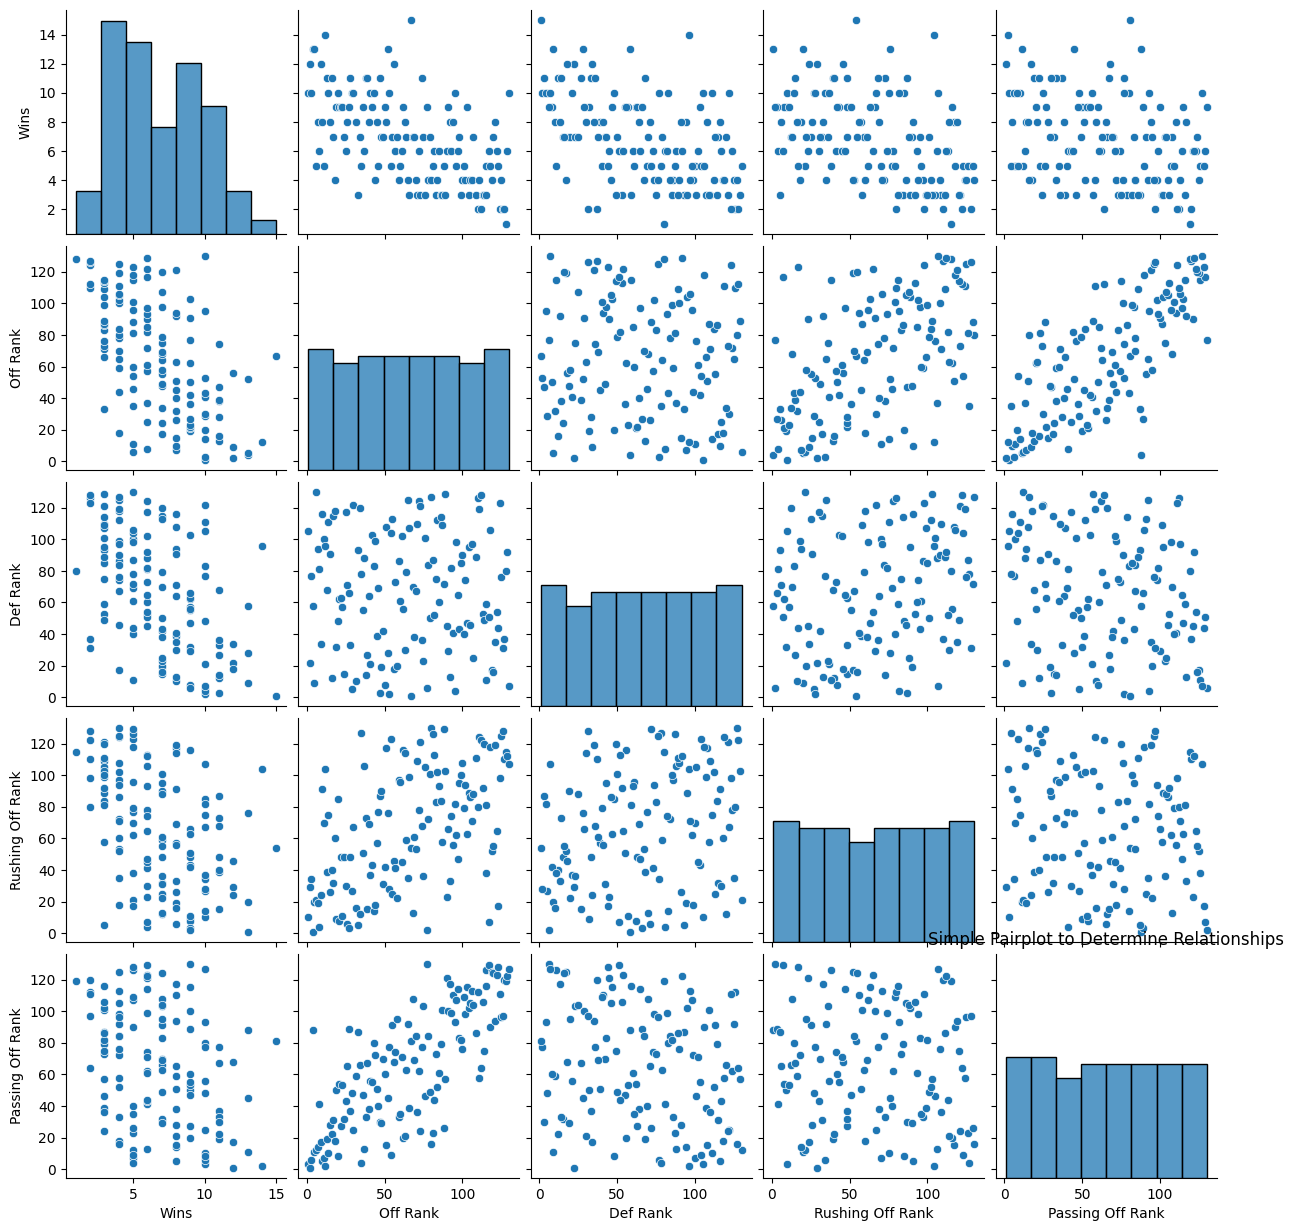

In [180]:
# Here is a pairplot so we can begin to see relationships
sns.pairplot(conferences)
plt.title("Simple Pairplot to Determine Relationships")
plt.show()

As we can see with this pairplot, there seems to be relationships between some variables, such as offensive rank and passing yards. Other variables, such as Passing rank and Rushing rank have almost no correlation. This leads me to belive that there are very specific playstyles among each team. And maybe we could gain insight from this...

Before I begin doing inference and prediction, is ther enaything else wrong with the data? Let's look:

In [181]:
#type(cfb['Time of Possession'][0])

As we can see, the time of possession column is encoded as strings, which won't work. Luckily we won't need to examine this to answer my questions, so let's drop the columns.

In [182]:
#This drops the two timing columns, and the inplace argument makes sure it stays removed.
cfb.drop(['Time of Possession', 'Average Time of Possession per Game'], axis=1, inplace=True)

To help examine conference relationships, I also want to make a grouped dataframe that is soleley statistics for each conference, rather than each team. To do that, I will group the cfb dataframe by conference. 

In [183]:
grouped = conferences.groupby('Conference').agg(
    Average_Offensive_Rank=('Off Rank', 'mean'),
    Average_Defensive_Rank=('Def Rank', 'mean'),
    Average_Passing_Off = ('Passing Off Rank', 'mean'),
    Average_Rushing_Off = ('Rushing Off Rank', 'mean')
).reset_index().sort_values('Average_Defensive_Rank')
grouped

,Conference,Average_Offensive_Rank,Average_Defensive_Rank,Average_Passing_Off,Average_Rushing_Off
3,Big Ten,90.071429,34.714286,83.500000,78.714286
6,MAC,100.454545,48.545455,102.454545,77.636364
9,SEC,57.357143,53.000000,54.428571,62.142857
1,ACC,68.000000,55.384615,75.923077,54.538462
5,FBS Independent,84.000000,66.250000,89.500000,51.750000
8,Pac-12,48.916667,72.416667,39.750000,77.583333
7,Mountain West,66.666667,78.083333,69.083333,60.833333
10,Sun Belt,56.538462,78.615385,59.307692,63.000000
0,AAC,61.857143,78.928571,58.357143,66.571429
2,Big 12,41.500000,82.071429,47.785714,51.071429


This looks correct! There are 11 rows - 10 for each FBS conference, and one for the independent teams. But even though the independent teams are legitmate FBS teams, since we will use this dataset to examine only conference relationships, let's get rid of it.

In [184]:
conferences = conferences[conferences['Conference']!='FBS Independent']
grouped = conferences.groupby('Conference').agg(
    Average_Offensive_Rank=('Off Rank', 'mean'),
    Average_Defensive_Rank=('Def Rank', 'mean'),
    Average_Passing_Off = ('Passing Off Rank', 'mean'),
    Average_Rushing_Off = ('Rushing Off Rank', 'mean')
).reset_index().sort_values('Average_Defensive_Rank')
grouped

,Conference,Average_Offensive_Rank,Average_Defensive_Rank,Average_Passing_Off,Average_Rushing_Off
3,Big Ten,90.071429,34.714286,83.500000,78.714286
5,MAC,100.454545,48.545455,102.454545,77.636364
8,SEC,57.357143,53.000000,54.428571,62.142857
1,ACC,68.000000,55.384615,75.923077,54.538462
7,Pac-12,48.916667,72.416667,39.750000,77.583333
6,Mountain West,66.666667,78.083333,69.083333,60.833333
9,Sun Belt,56.538462,78.615385,59.307692,63.000000
0,AAC,61.857143,78.928571,58.357143,66.571429
2,Big 12,41.500000,82.071429,47.785714,51.071429
4,CUSA,59.571429,90.857143,55.142857,76.428571


This is the end of my exploration section. What have I accomplished? 
- Changed the datatype of the columns to the correct values (str, float, etc...)
- Removed missing data (reclassifying...)
- Removed FCS Schools
- Created seperate columns for wins and losses
- Created a conference column

I have also simply visualised some of the variables to gather insight about relationships. Going into the last part of the project, I have some idea of what I want to discover, and now that I have properly cleaned the data and made relevant dataframes, I can do so with ease. 

Here are the dataframes I will be using from here on out: 

In [185]:
cfb.head(5)

,Unnamed: 0,Off Rank,Team,Games,Win-Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,3rd Down Def Rank,Opp 3rd Conversion,Opp 3rd Attempt,Opponent 3rd Percent,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks_x,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Touchbacks_y,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown_x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Time of Possession Rank,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses,Conference
0,0,1,LSU,13,10-3,841,7065,8.40,78,543.5,105,882,5416,6.14,47,47,416.6,2,129,71,0.550,114,78,174,0.448,106,6,15,0.400,31,13,30,0.433,67,79,672,51.69,103,116,144,14,274,103,116,144,14,274,75,35,52,723,0,20.66,75,35,52,723,0,20.66,3,411,286,5,4406,10.72,15.41,44,338.9,115,268,420,3323,23,7.91,12.40,255.6,2,2,-1,0,-0.50,2,2,-1,0,-0.50,109,46,17,16,8,41,0.891,20,65,30,19,10,59,0.908,85,462,2093,4.53,24,161.0,10,430,2659,6.18,34,204.5,78,47,41,4,0,11,0,364,28.0,1,79,78,1,0,12,1,592,45.5,43,22,96,1.69,65,53,40,302,73,5.6,94,23,4,10,14,3,5,8,6,0.46,10,3,SEC
1,1,2,Oregon,14,12-2,951,7440,7.82,82,531.4,22,893,4458,4.99,26,27,318.4,3,155,79,0.510,36,68,190,0.358,6,19,25,0.760,49,18,38,0.474,106,93,848,60.57,64,84,140,29,253,64,84,140,29,253,13,27,73,437,0,16.19,13,27,73,437,0,16.19,1,514,397,5,4857,9.45,12.23,49,346.9,54,296,492,3022,16,6.14,10.21,215.9,120,7,96,0,13.71,120,7,96,0,13.71,68,42,10,13,12,35,0.833,40,74,27,29,9,65,0.878,10,401,1436,3.58,10,102.6,29,437,2583,5.91,33,184.5,9,27,20,2,0,15,0,231,16.5,2,83,75,5,0,12,0,619,44.2,1,5,31,0.36,100,58,26,367,71,5.1,41,9,6,12,18,2,5,7,11,0.79,12,2,Pac-12
2,2,3,Oklahoma,13,10-3,974,6591,6.77,66,507.0,77,935,5062,5.41,32,35,389.4,7,177,87,0.492,14,6

In [186]:
conferences.head(5)

,Team,Conference,Wins,Off Rank,Def Rank,Rushing Off Rank,Passing Off Rank
0,LSU,SEC,10,1,105,10,3
1,Oregon,Pac-12,12,2,22,29,1
2,Oklahoma,Big 12,10,3,77,34,6
3,Liberty,CUSA,13,4,58,1,88
4,Georgia,SEC,13,5,9,20,11


In [187]:
grouped

,Conference,Average_Offensive_Rank,Average_Defensive_Rank,Average_Passing_Off,Average_Rushing_Off
3,Big Ten,90.071429,34.714286,83.500000,78.714286
5,MAC,100.454545,48.545455,102.454545,77.636364
8,SEC,57.357143,53.000000,54.428571,62.142857
1,ACC,68.000000,55.384615,75.923077,54.538462
7,Pac-12,48.916667,72.416667,39.750000,77.583333
6,Mountain West,66.666667,78.083333,69.083333,60.833333
9,Sun Belt,56.538462,78.615385,59.307692,63.000000
0,AAC,61.857143,78.928571,58.357143,66.571429
2,Big 12,41.500000,82.071429,47.785714,51.071429
4,CUSA,59.571429,90.857143,55.142857,76.428571


# End of Data Exploration Section
Now I have cleaned my data enough to start inference and prediction. We have created new columns for wins/losses, a new conference column, changed the data type of most columns to be numeric, removed FCS teams (or teams with not enough relevent stats), removed time columns, and even drawn some simple plots to begin to see relationships. Now we can start answering questions.

# Predict Whether a Team Will Have a Winning Season

In a college football season, there are 12 games. If you win more games than you lose, that is a winning season. Let's make a new dataframe with a column winning season that has a 1 if the team had a winning season, and 0 if else. 

In [188]:
season = cfb[['Team', 'Wins', 'Losses', 'Penalties', 'First Downs', 'Off Yards per Game', 'Touchdowns Allowed', 'Yards Per Game Allowed']]

In [189]:
win_season = []
season['Winning Season'] = season['Wins'] > season['Losses']
season['Winning Season'] = season['Winning Season'].astype(int)
season

,Team,Wins,Losses,Penalties,First Downs,Off Yards per Game,Touchdowns Allowed,Yards Per Game Allowed,Winning Season
0,LSU,10,3,79,274,543.5,47,416.6,1
1,Oregon,12,2,93,253,531.4,27,318.4,1
2,Oklahoma,10,3,88,260,507.0,35,389.4,1
3,Liberty,13,1,88,284,499.1,44,372.6,1
4,Georgia,13,1,62,224,496.5,26,289.1,1
...,...,...,...,...,...,...,...,...,...
125,Akron,2,10,83,215,278.6,43,335.0,0
126,East Carolina,2,10,70,212,277.2,33,341.3,0
127,Kent St.,1,11,65,237,270.4,55,390.6,0
128,Eastern Mich.,6,7,81,289,262.8,42,401.6,0


Here is a scatterplot to allow us to see if there is maybe a relationship between yards per game and winning before we fit a logistic regression model.

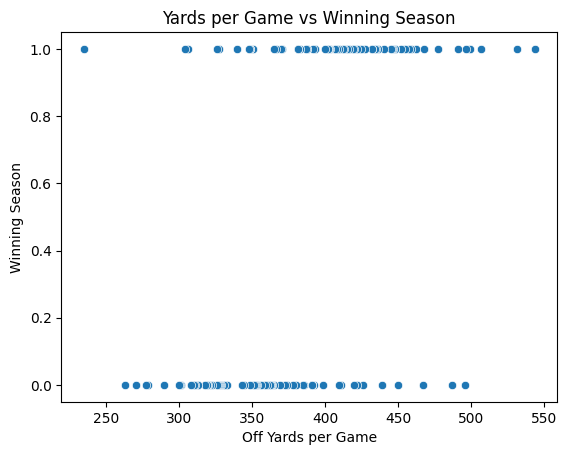

In [190]:
sns.scatterplot(data=season, x='Off Yards per Game', y='Winning Season')
plt.title('Yards per Game vs Winning Season')
plt.show()

We can kind of see that there is a positive correlation. if we were to fit the sigmoid curve it would probably show a positive slope. 

Here is a pairplot so we can see correlation among the variables. 

In [191]:
#sns.pairplot(season)

I am going to predict a winning season using logistic regression. The predictor I will use is Yards Per Game Allowed. In this next cell, I'll select those values as my X and y.

In [192]:
X = season['Off Yards per Game'].values.reshape(-1, 1) 
y = season['Winning Season'].values 

Here I am defining the typical sigma function to use with logistic regression

In [193]:
def sigma(t):
    return 1/(1 + np.exp(-t))

I wanted to create my own logistic regression implementation instead of directly using the sklearn model, because I want to more deeply understand what is going on. Here is the class I implemented with help from this youtube video: https://www.youtube.com/watch?v=YYEJ_GUguHw

I have added some comments to the code to show what exactly I am doing

In [194]:
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.001, num_iter=1000): # Both args can be modified to help with gradient descent
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights=None
        self.bias = None
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features) # Initialization to 0 for each weight
        self.bias = 0 # initial bias term, AKA intercept
        for i in range(self.num_iter):   
            linear_model = np.dot(X, self.weights) + self.bias # Computes weighted sum of each row 
            y_pred = sigma(linear_model) # Transforms to probability (Between 0-1). y_pred is a vector of probabilities
            
            dw = (1/num_samples) * np.dot(X.T, (y_pred-y)) # Derivative with respect to weight for gradient descent (minimize loss)
                                          
            db = (1/num_samples) * np.sum(y_pred - y) # Derivative with respect to bias
            self.weights -= self.learning_rate * dw # Update weight and bias for each iteration
            self.bias -= self.learning_rate * db
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias 
        y_pred = sigma(linear_model)
        y_predicted = [1 if p > 0.5 else 0 for p in y_pred]
        return np.array(y_predicted)      

Here I am splitting up my data in order to train and test it, since it itsn't proper to use whole dataset for training. 
I am also scaling the data just so we don'h have certain predictors that impact the data too much. It is always better safe than sorry.

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2)

This cell I am defining my model and fitting it with the training set. 

In [196]:
lrm = OwnLogisticRegression(learning_rate=0.001, num_iter=1000)
lrm.fit(X_train, y_train)


I also want to check my predictions to make sure it's not doing anything bad, for example predicting all 0s or 1s. 

In [197]:
predictions = lrm.predict(X_test)
predictions # Should be 1s and 0s. 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0])

And finally I am checking accuracy. We get over 73%, which is better than randomly guessing! But it's not super accurate

In [198]:
def accuracy(true_y, y_pred):
    accuracy = np.sum(true_y == y_pred)/ len(true_y)
    return accuracy
print(accuracy(y_test, predictions))

0.6923076923076923


Let's put all that into a function so we can test accuracies of different predictors.

In [199]:
def get_accuracy(predictor, predicted): 
    temp_X = season[predictor].values.reshape(-1, 1) 
    temp_y = season[predicted].values 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(temp_X)
    temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X_scaled,temp_y, test_size=0.2)
    temp_lrm = OwnLogisticRegression(learning_rate=0.0001, num_iter=1000)
    temp_lrm.fit(temp_X_train, temp_y_train)
    temp_predictions = temp_lrm.predict(temp_X_test)
    print(temp_predictions)
    return accuracy(temp_y_test, temp_predictions)
accuracies = []
predictors = ['Penalties', 'First Downs', 'Off Yards per Game', 'Touchdowns Allowed', 'Yards Per Game Allowed']
for pred in predictors:
    accuracies.append(get_accuracy(pred, 'Winning Season'))
predicted_accuracy = pd.DataFrame({'Predictors': predictors, 'Accuracy': accuracies})
predicted_accuracy

[0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1]
[1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1]
[1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0]


,Predictors,Accuracy
0,Penalties,0.500000
1,First Downs,0.423077
2,Off Yards per Game,0.730769
3,Touchdowns Allowed,0.730769
4,Yards Per Game Allowed,0.807692


The resulting dataframe shows that penalties and First downs are very bad predictors of winning seasons, while Offensive yards per game, touchdowns allowed, and Yards per game allowed are better. Most of this makes sense. I figure Penalties would be a bad predictor because bad teams probably have a lot of penalties, but so do good teams because they play harder competition and try trickier plays. But why is First downs such a bad predictor? Shouldn't good teams have more first downs? We can check to see if it's a problem with our model or just an oddity in the data by plotting the sigmoid curve using skikit learn. 

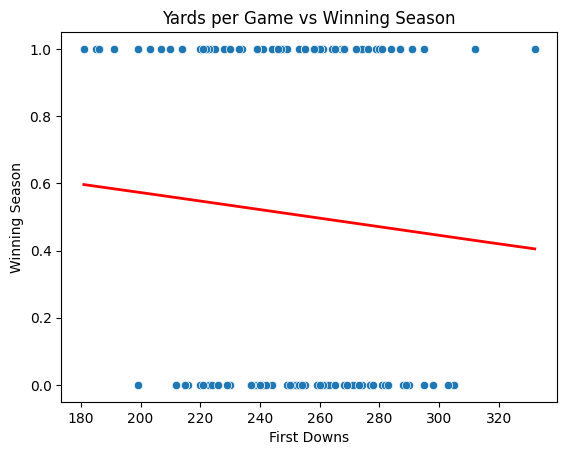

In [200]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
X = season['First Downs'].values.reshape(-1, 1) 
y = season['Winning Season'].values 
log_reg.fit(X,y)
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_range)[:, 1]
#y_prob = 1 - y_prob
sns.scatterplot(data=season, x='First Downs', y='Winning Season')
plt.plot(x_range, y_prob, color='red', label='Sigmoid Curve', linewidth=2)
plt.title('Yards per Game vs Winning Season')
plt.show()



We can see that there is not really an apparent correlation between winning and first downs count. I think this could mean that good teams get fewer first downs because they have longer plays where they are getting one first down on a single 50 yard play, for example. 

We can also plot the same curve for every predictor. Let's look at Off Yards per Game to see if it looks right. 

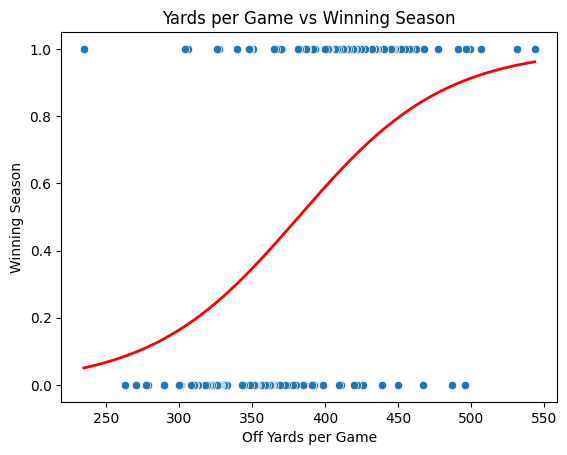

In [201]:

X = season['Off Yards per Game'].values.reshape(-1, 1) 
y = season['Winning Season'].values 
log_reg.fit(X,y)
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_range)[:, 1]
#y_prob = 1 - y_prob
sns.scatterplot(data=season, x='Off Yards per Game', y='Winning Season')
plt.plot(x_range, y_prob, color='red', label='Sigmoid Curve', linewidth=2)
plt.title('Yards per Game vs Winning Season')
plt.show()


Looks good!
Lastly let's just compare our results to the built in model with scikit learn. We can compare our accuracies and see that they are similar. For example, our Off YPG predictor was 73% accurate, and the scikit learn implementation is also 73% accurate!

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X = season['Off Yards per Game'].values.reshape(-1, 1)  # Feature
y = season['Winning Season'].values  # Target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True)
log_reg = LogisticRegression()
logreg_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_reg.fit(X_train, y_train)
    y_hat = log_reg.predict(X_test)
    logreg_scores.append(accuracy_score(y_test, y_hat))
mean_score_lr = sum(logreg_scores)/len(logreg_scores)
mean_score_lr

0.7418461538461539

Our predictor is somewhat accurate. But I think it could be better with a different model. Let's look at this scatterplot below:

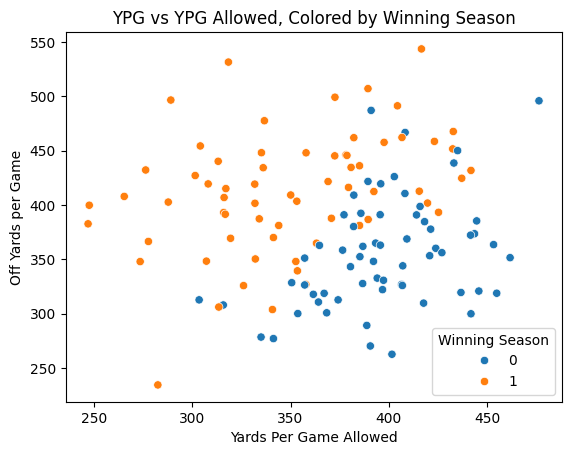

In [203]:
sns.scatterplot(data=season, x='Yards Per Game Allowed', y='Off Yards per Game', hue='Winning Season')
plt.title('YPG vs YPG Allowed, Colored by Winning Season')
plt.show()

This looks like there is a clear cluster of teams based on Off Yards per game and Yards per game allowed. That means, I think, that we could run a KNN classifier with more success. 

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

X = season[['Off Yards per Game', 'Yards Per Game Allowed']].values
y = season['Winning Season'].values 
knn = KNeighborsClassifier(n_neighbors=5) 
kf = KFold(n_splits=5, shuffle=True)
knn_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, y_hat))
# Calculate average score
mean_score = sum(knn_scores)/len(knn_scores)
mean_score

0.7975384615384615

We can see that the accuracy of this classifier is indeed more accurate. It is important that we consider the best model when doing prediction. There are probably even better models, or values for n, or predictors, but I think this is good enough for now. 

# Takeaways

We learned that certain stats, like yards per game or yards per game allowed are decent measures of success, whereas first downs and penalties are not good at distinguishing. We also learned that KNN is a better classifier for this example. Lastly, I personally better learned how logistic regression works through my own implementation. 

# Inference - Are first downs correlated with Winning?

We saw that first downs were not an accurate predictor for winning games. But I want to dive deeper and quantify confidence. 

In [205]:
season

,Team,Wins,Losses,Penalties,First Downs,Off Yards per Game,Touchdowns Allowed,Yards Per Game Allowed,Winning Season
0,LSU,10,3,79,274,543.5,47,416.6,1
1,Oregon,12,2,93,253,531.4,27,318.4,1
2,Oklahoma,10,3,88,260,507.0,35,389.4,1
3,Liberty,13,1,88,284,499.1,44,372.6,1
4,Georgia,13,1,62,224,496.5,26,289.1,1
...,...,...,...,...,...,...,...,...,...
125,Akron,2,10,83,215,278.6,43,335.0,0
126,East Carolina,2,10,70,212,277.2,33,341.3,0
127,Kent St.,1,11,65,237,270.4,55,390.6,0
128,Eastern Mich.,6,7,81,289,262.8,42,401.6,0


Here, I am using a linear model to make a regression line. This shouldn't be used to conclude significance, but it can be used to see a correlation. 

In [206]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(season[['First Downs']], season['Wins'])
lm.coef_

array([-0.0040925])

We see the slope of the line is negative, which is surprising (to me). Let's plot the line. 

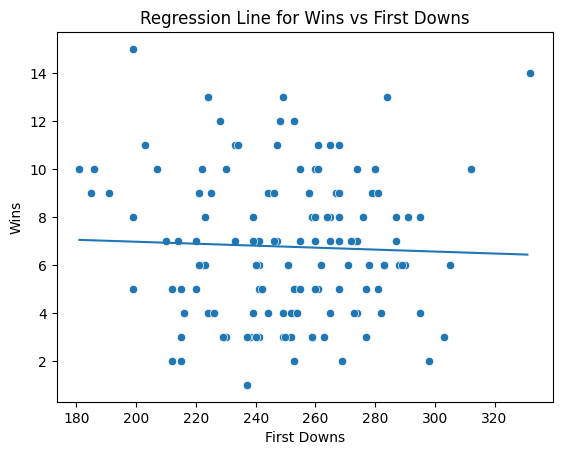

In [207]:
x_plane = np.arange(season['First Downs'].min(), season['First Downs'].max(), 1)
regression_line = ((lm.coef_ * x_plane) + lm.intercept_)
sns.scatterplot(data=season, x='First Downs', y='Wins')
sns.lineplot(x=x_plane, y=regression_line)
plt.title('Regression Line for Wins vs First Downs')
plt.show()

To test if first downs actually have an effect on winning, we'll want to do a statistical test and not just look at a graph. For this test, I will use a null hypothesis that first downs do not have an effect on winning, and an alternative hypothesis that they do. If the p-value generated is less than 0.05, that means that we reject the null and assume that first downs do have an effect on winning. 

In [208]:
import statsmodels.api as sm
first_downs = season['First Downs']
wins = season['Wins']  
first_downs = sm.add_constant(first_downs)
model = sm.OLS(wins, first_downs).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1859
Date:                Wed, 29 Oct 2025   Prob (F-statistic):              0.667
Time:                        15:14:59   Log-Likelihood:                -322.68
No. Observations:                 128   AIC:                             649.4
Df Residuals:                     126   BIC:                             655.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7845      2.396      3.249      

This statsmodel package is one i found that is very useful for calculating p-values, confidence intervals, etc... It computes p-values by fitting a regression line like I did, then computes error for each value, and a t-statistic for each, with n-2 degrees of freedom. 

Here we can see that the p-value is 0.667. This means that there is a 66% chance of obseriving equally or more extreme results assuming the null is true (first downs do not affect winning). Thus we can very safely reject the null and assume first downs do not impact winning. But what about the confidence interval?

In [209]:
print(model.conf_int())

                    0          1
const        3.042417  12.526555
First Downs -0.022876   0.014691


What this means is that, if we run the trials again, there is a 95% chance that we get a slope between -0.02 and 0.01, and the corresponding slopes. Let's plot these to get a general idea. 

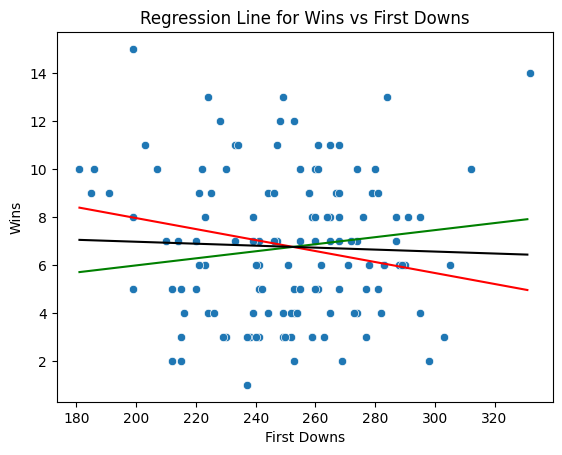

In [210]:
x_plane = np.arange(season['First Downs'].min(), season['First Downs'].max(), 1)
regression_line = ((lm.coef_ * x_plane) + lm.intercept_)
lower_ci = ((-0.022876 * x_plane) + 12.526555)
upper_ci = ((0.014691 * x_plane) + 3.042417)
sns.scatterplot(data=season, x='First Downs', y='Wins')
sns.lineplot(x=x_plane, y=lower_ci, color='red')
sns.lineplot(x=x_plane, y=upper_ci, color='green')
sns.lineplot(x=x_plane, y=regression_line, color='black')
plt.title('Regression Line for Wins vs First Downs')
plt.show()

We can also do this manually by bootstrapping. In bootstrapping, we sample with replacement a bunch of times and compute confidence intervals. We can simply compute the lower and upper boud CIs using np.percentile. 

In [211]:
observed_corr = np.corrcoef(season['Wins'], season['First Downs'])[0, 1]

bootstrap_corrs = np.zeros(10000)
for i in range(10000):
    sample_df = season.sample(n=len(season), replace=True)
    bootstrap_corrs[i] = np.corrcoef(sample_df['Wins'], sample_df['First Downs'])[0, 1]
    
lower_ci = np.percentile(bootstrap_corrs, 2.5)
upper_ci = np.percentile(bootstrap_corrs, 97.5)

p_value = np.mean((np.abs(bootstrap_corrs)) >= (np.abs(observed_corr)))


In [212]:
p_value

0.7383

We can see that the p_value is similar to the one computed from the statsmodel library. When I run it I got 0.733, but it is differnet every time you run it. Anyways, it is similar to the 0.667 computed earlier. Now let's plot the histogram.

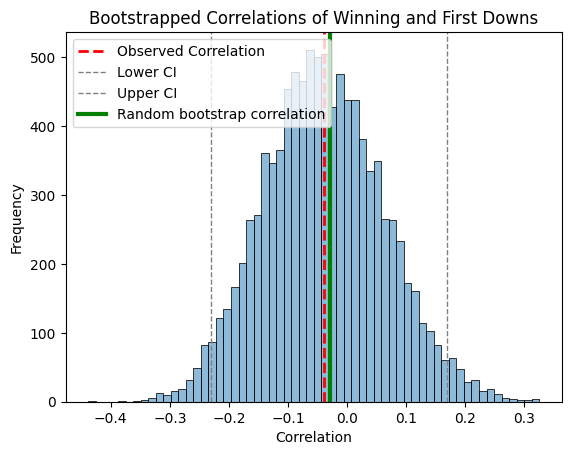

In [213]:
sns.histplot(bootstrap_corrs, alpha=0.5)
plt.axvline(observed_corr, color='red', linewidth=2, label='Observed Correlation', linestyle = '--')
plt.axvline(lower_ci, color='grey', linewidth=1, label='Lower CI', linestyle = '--')
plt.axvline(upper_ci, color='grey', linewidth=1, label='Upper CI', linestyle = '--')
plt.axvline(bootstrap_corrs[0], color='green', linewidth=3, label='Random bootstrap correlation')
plt.title("Bootstrapped Correlations of Winning and First Downs")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.legend()
plt.show()

This graph shows our correlation we observed right in the smack dab middle of the confidence interval. If it was towards the edge, outside of the CI bounds, we could reject the null, but we don't. So what did we learn from this analysis? We learned that it is fairly safe to assume that first downs do not have an impact on winning. 

# Question - Do Teams in the Same Conference Play Similar Types of Football? (Pass-heavy, Defense-heavy, etc...)

# Inference Section - Can we tell if there's a Difference?

This simple bar plot shows the defensive ranking of different conferences on average. We can sort of see there is a difference between conferences. 

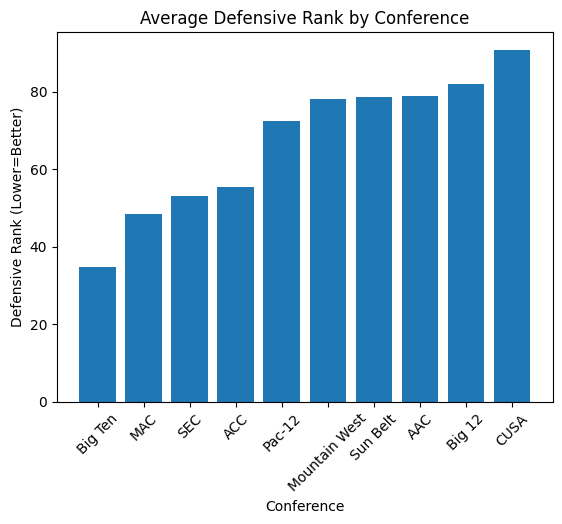

In [214]:
plt.bar(grouped['Conference'], grouped['Average_Defensive_Rank'])
plt.xticks(rotation=45)
plt.xlabel('Conference')
plt.ylabel('Defensive Rank (Lower=Better)')
plt.title('Average Defensive Rank by Conference')
plt.show()

I want to create new columns, Team Style and Offensive Style. The Team Style Column will be a weight comparing how much a team values offense compares to defense, and the Offensive Style will be similar but with a focus on running vs passing specifically.

In [215]:
conferences

,Team,Conference,Wins,Off Rank,Def Rank,Rushing Off Rank,Passing Off Rank
0,LSU,SEC,10,1,105,10,3
1,Oregon,Pac-12,12,2,22,29,1
2,Oklahoma,Big 12,10,3,77,34,6
3,Liberty,CUSA,13,4,58,1,88
4,Georgia,SEC,13,5,9,20,11
...,...,...,...,...,...,...,...
125,Akron,MAC,2,126,31,128,97
126,East Carolina,AAC,2,127,37,110,120
127,Kent St.,MAC,1,128,80,115,119
128,Eastern Mich.,MAC,6,129,92,112,122


In [216]:
conferences['Team Style'] = (conferences['Def Rank'] -  conferences['Off Rank']) / len(conferences)
conferences['Off Style'] = (conferences['Rushing Off Rank'] -  conferences['Passing Off Rank']) / len(conferences)
conferences

,Team,Conference,Wins,Off Rank,Def Rank,Rushing Off Rank,Passing Off Rank,Team Style,Off Style
0,LSU,SEC,10,1,105,10,3,0.838710,0.056452
1,Oregon,Pac-12,12,2,22,29,1,0.161290,0.225806
2,Oklahoma,Big 12,10,3,77,34,6,0.596774,0.225806
3,Liberty,CUSA,13,4,58,1,88,0.435484,-0.701613
4,Georgia,SEC,13,5,9,20,11,0.032258,0.072581
...,...,...,...,...,...,...,...,...,...
125,Akron,MAC,2,126,31,128,97,-0.766129,0.250000
126,East Carolina,AAC,2,127,37,110,120,-0.725806,-0.080645
127,Kent St.,MAC,1,128,80,115,119,-0.387097,-0.032258
128,Eastern Mich.,MAC,6,129,92,112,122,-0.298387,-0.080645


So is there a big difference in playstyles? Let's plot the new columns to see if we notice an obvious relationship:

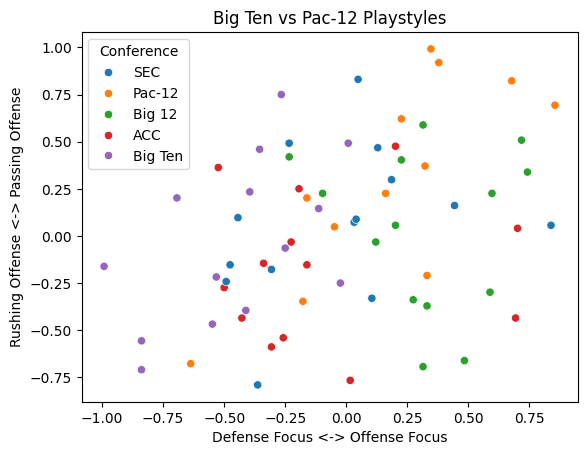

In [217]:
sns.scatterplot(data=conferences[conferences['Conference'].isin(['Pac-12', 'Big Ten', 'Big 12', 'ACC', 'SEC'])], x='Team Style', y='Off Style', hue='Conference')
plt.title('Big Ten vs Pac-12 Playstyles')
plt.xlabel('Defense Focus <-> Offense Focus')
plt.ylabel('Rushing Offense <-> Passing Offense')
plt.show()

There are a lot of points so it's hard to tell. But there looks to be a slight relationship... For example, the Big 12 teams and Pac-12 teams seem to be concentrated on the right(More Offensive than Defensive). Let's look at two specific conferences to see if there is a more obvious relationship.

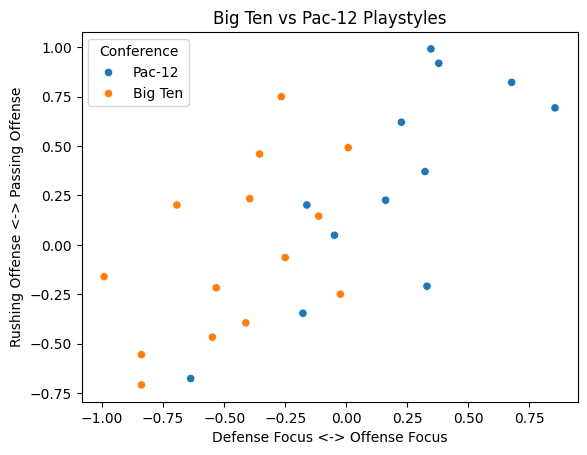

In [218]:
sns.scatterplot(data=conferences[conferences['Conference'].isin(['Pac-12', 'Big Ten'])], x='Team Style', y='Off Style', hue='Conference')
plt.title('Big Ten vs Pac-12 Playstyles')
plt.xlabel('Defense Focus <-> Offense Focus')
plt.ylabel('Rushing Offense <-> Passing Offense')
plt.show()

Now we can see that there is a clear difference between the teams in the Pac-12 and Big Ten. But Let's do a T Test to see if this difference is significant.

In [219]:
from scipy.stats import ttest_ind
B1G = conferences[conferences['Conference'] == 'Big Ten']
PAC = conferences[conferences['Conference'] == 'Pac-12']
total_off_mean = conferences['Off Style'].mean()
B1G_off_mean = B1G['Off Style'].mean()
PAC_off_mean = PAC['Off Style'].mean()
t_stat, p_value = ttest_ind(B1G['Off Style'], PAC['Off Style'])
p_value

0.08174859164591526

As we see, the p-value is 0.08, which means we should not assume that the Pac and B1G offensive styles are different, though it is close... What if we compare Pac-12 offensive styles to the rest of the country, and not just the Big Ten?

In [220]:
t_stat_off, p_value_off = ttest_ind(conferences['Off Style'], PAC['Off Style'])
p_value_off
#t_stat_ov, p_value_ov = ttest_ind(PAC['Team Style'], conferences['Team Style'])
#p_value_ov

0.03578907554580528

The P-value for Offensive style comparing the Pac 12 to the nation is 0.03, which means we reject the null! This implies the Pac-12 is significantly different from the average team, in that they tend to focus more on passing than rushing. But the p-value for overall style (Offense vs Defense) is 0.16, which means that they are not significantly different from other teams in this aspect. But it is close enough to make it worth expanding on... Perhaps by looking at both variables, we can accurately predict conference. Let's examine this further by creating dataframes specifically for each power conference. 

In [221]:
SEC = conferences[conferences['Conference'] == 'SEC']
B12 = conferences[conferences['Conference'] == 'Big 12']
ACC = conferences[conferences['Conference'] == 'ACC']

Now let's make histograms for Offensive Styles and Team Styles to see if we can notice trends.

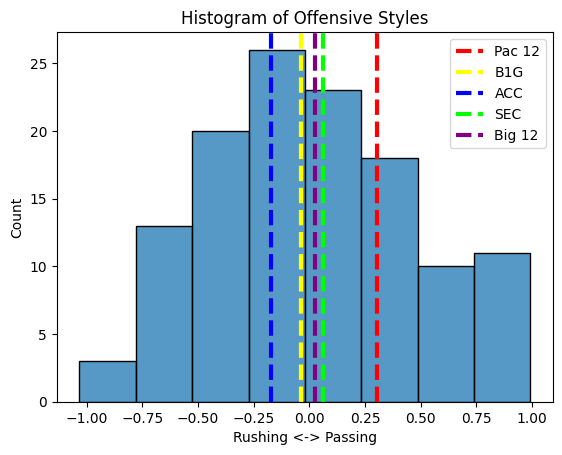

In [222]:
sns.histplot(conferences['Off Style'], alpha=0.75)
plt.axvline(np.mean(PAC['Off Style']), color='red', linestyle='--', label='Pac 12', lw=3)
plt.axvline(np.mean(B1G['Off Style']), color='yellow', linestyle='--', label='B1G', lw=3)
plt.axvline(np.mean(ACC['Off Style']), color='blue', linestyle='--', label='ACC', lw=3)
plt.axvline(np.mean(SEC['Off Style']), color='lime', linestyle='--', label='SEC', lw=3)
plt.axvline(np.mean(B12['Off Style']), color='purple', linestyle='--', label='Big 12', lw=3)
plt.legend()
plt.title('Histogram of Offensive Styles')
plt.xlabel('Rushing <-> Passing')
plt.show()

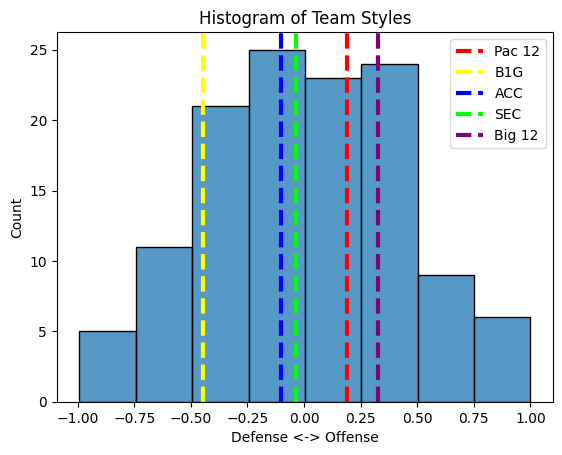

In [223]:
sns.histplot(conferences['Team Style'], alpha=0.75)
plt.axvline(np.mean(PAC['Team Style']), color='red', linestyle='--', label='Pac 12', lw=3)
plt.axvline(np.mean(B1G['Team Style']), color='yellow', linestyle='--', label='B1G', lw=3)
plt.axvline(np.mean(ACC['Team Style']), color='blue', linestyle='--', label='ACC', lw=3)
plt.axvline(np.mean(SEC['Team Style']), color='lime', linestyle='--', label='SEC', lw=3)
plt.axvline(np.mean(B12['Team Style']), color='purple', linestyle='--', label='Big 12', lw=3)
plt.legend()
plt.title('Histogram of Team Styles')
plt.xlabel('Defense <-> Offense')
plt.show()

This seems to me a noticable difference in team styles... Let's make a KNN classifier to see if we can accurately predict team's conferences...

# Prediction Section - Predict Conference Based on Playstyle

In [224]:
# Importing tools for KNN Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
conferences

,Team,Conference,Wins,Off Rank,Def Rank,Rushing Off Rank,Passing Off Rank,Team Style,Off Style
0,LSU,SEC,10,1,105,10,3,0.838710,0.056452
1,Oregon,Pac-12,12,2,22,29,1,0.161290,0.225806
2,Oklahoma,Big 12,10,3,77,34,6,0.596774,0.225806
3,Liberty,CUSA,13,4,58,1,88,0.435484,-0.701613
4,Georgia,SEC,13,5,9,20,11,0.032258,0.072581
...,...,...,...,...,...,...,...,...,...
125,Akron,MAC,2,126,31,128,97,-0.766129,0.250000
126,East Carolina,AAC,2,127,37,110,120,-0.725806,-0.080645
127,Kent St.,MAC,1,128,80,115,119,-0.387097,-0.032258
128,Eastern Mich.,MAC,6,129,92,112,122,-0.298387,-0.080645


This column does all the work behind knn. Here, I define the columns I want to test on (Team Style and Offensive Style), the train/test split, the k number, and I fit the model which works very similarly to the LinearRegression model we've used in lab. The score at the end represents accuracy of the model.

In [225]:
test_cols = ['Team Style', 'Off Style']
p5_conferences = conferences[conferences['Conference'].isin(['SEC', 'Big 12', 'Pac-12', 'ACC', 'Big Ten'])]
X = p5_conferences[test_cols]
Y = p5_conferences['Conference']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.07142857142857142

In [226]:
#Predicted Conferences for every team
clf.predict(p5_conferences[test_cols])

array(['Big 12', 'Big 12', 'Big 12', 'Big 12', 'Big 12', 'ACC', 'Big 12',
       'Big 12', 'Big 12', 'Pac-12', 'Big 12', 'Big 12', 'ACC', 'Big 12',
       'Big 12', 'Big 12', 'Big 12', 'Big 12', 'ACC', 'Big 12', 'Big 12',
       'Pac-12', 'ACC', 'Big Ten', 'Pac-12', 'Big 12', 'Big 12', 'ACC',
       'Big 12', 'ACC', 'ACC', 'ACC', 'ACC', 'Big 12', 'SEC', 'Big 12',
       'SEC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'Big 12', 'Pac-12',
       'Big Ten', 'ACC', 'ACC', 'ACC', 'SEC', 'Big Ten', 'ACC', 'ACC',
       'Big Ten', 'Pac-12', 'SEC', 'ACC', 'SEC', 'Pac-12', 'ACC',
       'Big Ten', 'Big Ten', 'Pac-12', 'Big Ten', 'Big Ten', 'ACC',
       'Big Ten', 'Big Ten'], dtype=object)

In [227]:
p5_conferences['Predicted Conference'] = clf.predict(p5_conferences[test_cols])

In [228]:
#Accuracy of the model on my data
sum(p5_conferences['Predicted Conference'] == p5_conferences['Conference']) / len(p5_conferences)

0.43283582089552236

As we see, the accuracy on our dataset is 43.2%. This doesn't seem too impressive, but when you consider that we are looking at 5 conferences, if we guessed randomly we'd only get 20%, so this number is not too bad. And perhaps we could more accurately predict with a different k-value?

In [229]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
p5_conferences['Predicted Conference'] = clf.predict(p5_conferences[test_cols])
sum(p5_conferences['Predicted Conference'] == p5_conferences['Conference']) / len(p5_conferences)

0.5074626865671642

This k-value predicts the right conference over 50% of the time! This is a fairly successful classifier. Let's look at the scatterplot

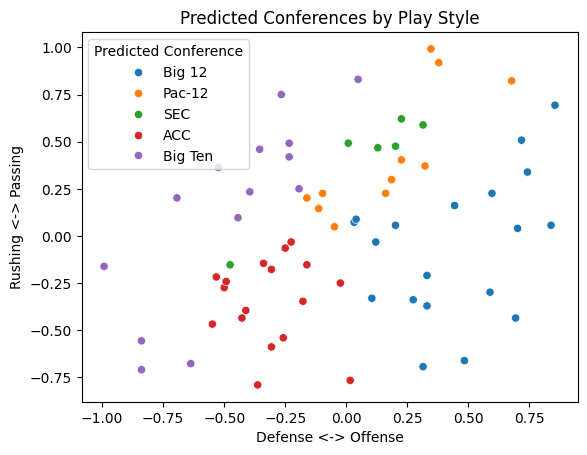

In [230]:
sns.scatterplot(data=p5_conferences, x=test_cols[0], y=test_cols[1], hue='Predicted Conference')
plt.xlabel('Defense <-> Offense')
plt.ylabel('Rushing <-> Passing')
plt.title('Predicted Conferences by Play Style')
plt.show()

As we can see, this graph finds teams that are close by on the scatterplot and groups them into predicted conference. We can see that teams with Offensive, pass-heavy playstyles are typically predicted as Pac 12, and teams with defense/rushing focuses are predicted to be Big Ten.

Tho help visualize, let's plot a similar scatter plot but with boundaries representing conference mean, with a size determined by std. This will show us what our classifier is thinking. 

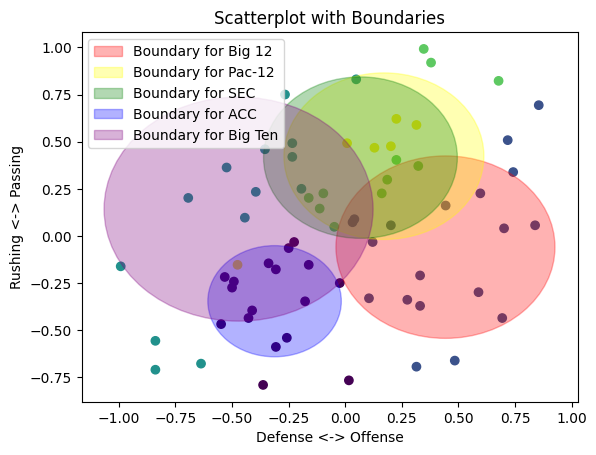

In [231]:
fig, ax = plt.subplots()
scatter = ax.scatter(p5_conferences['Team Style'], p5_conferences['Off Style'], c=pd.Categorical(p5_conferences['Predicted Conference']).codes, cmap='viridis')
pal = ['red', 'yellow', 'green', 'blue', 'purple']
for i, label in enumerate(p5_conferences['Predicted Conference'].unique()):
    group = p5_conferences[p5_conferences['Predicted Conference'] == label]
    mean_x = group['Team Style'].mean()
    mean_y = group['Off Style'].mean()
    radius = group[['Team Style', 'Off Style']].std().mean() * 1.5  # 1.5x standard deviation for radius
    circle = plt.Circle((mean_x, mean_y), radius, color=pal[i], alpha=0.3, label=f"Boundary for {label}")
    ax.add_patch(circle)
plt.title('Scatterplot with Boundaries')
plt.legend()
plt.xlabel('Defense <-> Offense')
plt.ylabel('Rushing <-> Passing')
plt.show()

It looks like the averages for the Pac-12 and SEC overlap quite a bit. Just for fun let's exclude these conferences and see how accurate we get. 

In [232]:
sum(p5_conferences[p5_conferences['Conference'].isin(['Big 12', 'ACC', 'Big Ten'])]['Predicted Conference'] == p5_conferences[p5_conferences['Conference'].isin(['Big 12', 'ACC', 'Big Ten'])]['Conference']) / len(p5_conferences[p5_conferences['Conference'].isin(['Big 12', 'ACC', 'Big Ten'])])

0.6097560975609756

Now we see our estimator is over 60% accurate! Quite the improvement. But this also proves that we are not very accurately predicting teams that have stats similar to a lot of other teams. 

# Takeaways


We learned in this section that there is a difference in playstyle between conferences, though we are not extremely confident. 